# **Analisis Data Amazon Sale Report**

*   Muhammad Farhan Akmal
*   Sofi Nurhayati Latifah
<br></br>

We will be answering these questions :

1.   How does sales performance vary across different categories, or sizes?
2.   How do sales volumes change over time (daily, weekly, monthly)?
3.   What percentage of orders face delivery delays or cancellations?




**For this project, we use the dataset E-Commerce Sales Dataset that we found from kaggle : https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data**

**About the dataset :**

This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size and Color, to help optimize product profitability



*   **Category**: Type of product. (String)

*   **Size**: Size of the product. (String)

*   **Date**: Date of the sale. (Date)

*   **Status**: Status of the sale. (String)

*   **Fulfilment**: Method of fulfilment. (String)

*   **Style**: Style of the product. (String)

*   **SKU**: Stock Keeping Unit. (String)

*   **ASIN**: Amazon Standard Identification Number. (String)

*   **Courier Status**: Status of the courier. (String)

*   **Qty**: Quantity of the product. (Integer)

*   **Amount**: Amount of the sale. (Float)

*   **B2B**: Business to business sale. (Boolean)

*   **Currency**: The currency used for the sale. (String)


## **Import Libraries**

First, we will import the necessary libraries that we will use for this project.

In [41]:
!pip install gdown

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import chardet
import missingno as msno
import gdown
import warnings
warnings.filterwarnings('ignore')

## **Data Reading**

Then, we read dataset set from the file.

In [43]:
url = 'https://drive.google.com/uc?id=1SQKGzdh9waGfiSMsdyGY-r4425Ivb5cS'
output = 'Amazon Sale Report'
gdown.download(url, output, quiet=True)

'Amazon Sale Report'

In [44]:
data = pd.read_csv('Amazon Sale Report')
df = pd.DataFrame(data)

## **Basic Data Exploratory**

To get a better understanding of the data, we do some basic data exploratory.


In [45]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [46]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [47]:
df.shape

(128975, 24)

In [48]:
def showinfo():
  info = pd.DataFrame(index = df.columns)
  info['Datatype'] = df.dtypes
  info['Non null values'] = df.count()
  info['Unique values'] = df.nunique()
  info['Null values'] = df.isnull().sum()
  info['Duplicated values'] = df.duplicated().sum()
  return info

showinfo()

,Datatype,Non null values,Unique values,Null values,Duplicated values
index,int64,128975,128975,0,0
Order ID,object,128975,120378,0,0
Date,object,128975,91,0,0
Status,object,128975,13,0,0
Fulfilment,object,128975,2,0,0
Sales Channel,object,128975,2,0,0
ship-service-level,object,128975,2,0,0
Style,object,128975,1377,0,0
SKU,object,128975,7195,0,0
Category,object,128975,9,0,0


In [49]:
# msno.bar(df)

# plt.show()

##**Data Preprocessing**


Before we use the data, we need to do preprocessing steps to ensure that the data is clean

### **Drop Attribute**

We're gonna drop unnecessary attributes that won't impact our analysis.

In [50]:
df = df.drop(['index', 'Unnamed: 22', 'promotion-ids'], axis=1)

### **Handling Duplicate Values**

Let's check for duplicated data

In [51]:
df.duplicated().sum()

6

As you can see from the results, there are 6 duplicated data. Let's take a deeper look.

In [52]:
df[df.duplicated(keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,Cancelled,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,False,NaN
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,Cancelled,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,False,NaN
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,Cancelled,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,False,NaN
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,Cancelled,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,False,NaN
79844,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,Cancelled,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,False,NaN
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,Cancelled,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,False,NaN
85790,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,False,NaN
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,False,NaN
86418,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,Shipped,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,False,NaN
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,Shipped,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,False,NaN


Based on the data shown, it shown that the cause is probably duplicate orders. So, we're going to just drop one of the duplicates and keep the other one.

In [53]:
df = df.drop_duplicates(keep='first')

### **Handling Missing Values**

From looking on the dataset, we have to decide what to do with the attribute that has the null value.

In [54]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
Courier Status,6872
currency,7792
Amount,7792
ship-city,33
ship-state,33
ship-postal-code,33
ship-country,33
fulfilled-by,89692


There are around 8 attributes that has null values. Let's check them out.

#### **Courier Status**

First, let's see the Courier Status data first.

In [55]:
df['Courier Status'].value_counts()

,count
Courier Status,
Shipped,109484
Unshipped,6681
Cancelled,5932


Let's see the data that has Courier Status as null

In [56]:
df[df['Courier Status'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
23,404-6019946-2909948,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,...,NaN,0,INR,570.48,pune,MAHARASHTRA,411044.0,IN,False,Easy Ship
29,404-5933402-8801952,04-30-22,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,...,NaN,0,NaN,NaN,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship
83,404-6522553-9345930,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-M,Set,M,...,NaN,0,INR,1105.36,DEHRADUN,UTTARAKHAND,248001.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128762,402-4651401-6366769,06-01-22,Cancelled,Merchant,Amazon.in,Standard,J0184,J0184-KR-A-S,kurta,S,...,NaN,0,INR,385.71,BENGALURU,KARNATAKA,560043.0,IN,False,Easy Ship
128808,408-4182027-2307535,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3619,JNE3619-KR-S,kurta,S,...,NaN,0,NaN,NaN,BENGALURU,KARNATAKA,560092.0,IN,False,Easy Ship
128855,402-1958677-2521967,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3568,JNE3568-KR-M,kurta,M,...,NaN,0,NaN,NaN,Cherukunnu (p.o),KERALA,670301.0,IN,False,Easy Ship
128875,403-9524128-9243508,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,XL,...,NaN,0,INR,734.29,Barabanki,UTTAR PRADESH,225001.0,IN,False,Easy Ship


After further inspection, we can see that there is a correlation between Courier Status, and Status. It seems that most of them is Cancelled, let's check even further.

In [57]:
df[df['Courier Status'].isnull()].groupby('Status')['Status'].count()

,Status
Status,
Cancelled,6861
Shipped - Delivered to Buyer,8
Shipped - Returned to Seller,3


The only courier status that has null values, has these 3 value of status. Let's see the distribution between Status for Courier Status.

In [58]:
pd.crosstab(df['Courier Status'], df['Status'], margins=True)

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller,Shipping,All
Courier Status,,,,,,,,,,,,,,
Cancelled,5837,2,0,93,0,0,0,0,0,0,0,0,0,5932
Shipped,0,10,0,77593,1,28761,5,35,973,11,1950,145,0,109484
Unshipped,5631,646,281,115,0,0,0,0,0,0,0,0,8,6681
All,11468,658,281,77801,1,28761,5,35,973,11,1950,145,8,122097


It seems that Courier Status has a correlation with Status. Cancelled in Courier Status corellates with Cancelled in Status, Shipped in Courier Status corellates with all the different kinds of Shipped type in Status, while Unshipped is mostly correlates with Cancelled.

In this scenario, we will assume that the data with Cancelled Status never shipped, so we change the null values into Cancelled. While the null value data with shipped status, will be changed into status.

In [59]:
df.loc[(df['Courier Status'].isnull()) & (df['Status'] == 'Cancelled'), 'Courier Status'] = 'Cancelled'
df.loc[(df['Courier Status'].isnull()) & (df['Status'].isin(['Shipped - Delivered to Buyer', 'Shipped - Returned to Seller'])), 'Courier Status'] = 'Shipped'

#### **Currency**

First, let's see the Currency data first.

In [60]:
df['currency'].value_counts()

,count
currency,
INR,121177


Because there is only one value for currency, then we just fill the null with INR.

In [61]:
df['currency'].fillna('INR', inplace=True)

#### **Amount** (Dicek lagi yang lebih merepresentasiin yang mana)

First, let's see the Amount data first.

In [62]:
df['Amount'].value_counts()

,count
Amount,
399.00,5442
771.00,2797
735.00,2436
0.00,2343
487.00,2293
...,...
558.10,1
551.42,1
973.00,1


Amount is the price of the product. First, We're going to fill the null values with the average price of the product with the same ASIN (which is basically the same product, but different variant) because it's best representing the data with missing values.

In [63]:
for index, row in df[df['Amount'].isnull()].iterrows():
  asin = row['ASIN']
  same_asin_rows = df[df['ASIN'] == asin]
  if same_asin_rows.shape[0] > 1:
    avg_amount = same_asin_rows['Amount'].mean()
    df.loc[index, 'Amount'] = avg_amount

In [64]:
print("There are still",df['Amount'].isnull().sum(), "Missing Values in the Amount Column.")

There are still 43 Missing Values in the Amount Column.


After that, we're going to fill the missing values with the item that have the same category, size, and style, because it's the best representing the data with missing values.

In [65]:
for index, row in df[df['Amount'].isnull()].iterrows():
  category = row['Category']
  size = row['Size']
  style = row['Style']
  same_category_size_style_rows = df[(df['Category'] == category) & (df['Size'] == size) & (df['Style'] == style)]
  if same_category_size_style_rows.shape[0] > 1:
    avg_amount = same_category_size_style_rows['Amount'].mean()
    df.loc[index, 'Amount'] = avg_amount

After that, we're going to fill the missing values with the item that have the same category, size, because it's the best representing the data with missing values.

In [66]:
for index, row in df[df['Amount'].isnull()].iterrows():
  category = row['Category']
  size = row['Size']
  style = row['Style']
  same_category_size_style_rows = df[(df['Category'] == category) & (df['Size'] == size)]
  if same_category_size_style_rows.shape[0] > 1:
    avg_amount = same_category_size_style_rows['Amount'].mean()
    df.loc[index, 'Amount'] = avg_amount

#### **Ship City, Ship State, Ship Postal Code, and Ship Country** (Ship Country belom diganti)

Let's see the Shipping data first.

In [67]:
df[df['ship-city'].isnull()]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,...,Shipped,1,INR,493.000000,NaN,NaN,NaN,NaN,False,NaN
1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,...,Shipped,1,INR,458.000000,NaN,NaN,NaN,NaN,False,NaN
8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,...,Shipped,1,INR,432.000000,NaN,NaN,NaN,NaN,False,NaN
11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,...,Shipped,1,INR,654.000000,NaN,NaN,NaN,NaN,False,NaN
13252,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,...,Cancelled,0,INR,380.000000,NaN,NaN,NaN,NaN,False,Easy Ship
15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,...,Shipped,1,INR,442.000000,NaN,NaN,NaN,NaN,False,NaN
16787,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,3XL,...,Shipped,1,INR,376.000000,NaN,NaN,NaN,NaN,False,Easy Ship
18351,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,XS,...,Shipped,1,INR,1112.000000,NaN,NaN,NaN,NaN,False,NaN
22930,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,S,...,Shipped,1,INR,654.000000,NaN,NaN,NaN,NaN,False,Easy Ship
24986,406-4079063-8291520,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,XXL,...,Unshipped,1,INR,399.000000,NaN,NaN,NaN,NaN,False,NaN


Because the shipping data contains address information, which is different for every orders, we're gonna fill the null values with unknown.

In [68]:
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-postal-code'].fillna('Unknown', inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)

#### **Fulfilled By**

First, let's see the Fulfilled by data first.

In [69]:
df['fulfilled-by'].value_counts()

,count
fulfilled-by,
Easy Ship,39277


If we look at the data, Easy Ship is an amazon delivery service, We'll assume that the null values means that it uses other delivery service. We're going to fill the null values with 'Others'.

In [70]:
df['fulfilled-by'].fillna('Others', inplace=True)

### **Data Type Conversion**

We'll check the datatype for each attribute.

In [71]:
def showinfo():
  info = pd.DataFrame(index = df.columns)
  info['Datatype'] = df.dtypes
  return info

showinfo()

,Datatype
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object
Size,object


We're going to convert the categorical attributes into a category datatype.

In [72]:
categorical_columns = ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency', 'ship-country', 'fulfilled-by']

for column in categorical_columns:
  df[column] = df[column].astype('category')


and then, we're going to convert the date into a date datatype.

In [73]:
df['Date'] = pd.to_datetime(df['Date'])

Here is the df with after datatype conversion.

In [74]:
def showinfo():
  info = pd.DataFrame(index = df.columns)
  info['Datatype'] = df.dtypes
  return info

showinfo()

,Datatype
Order ID,object
Date,datetime64[ns]
Status,category
Fulfilment,category
Sales Channel,category
ship-service-level,category
Style,object
SKU,object
Category,category
Size,category


### **Feature Extraction**

We're going to create a Month attribute for further analysis.

In [75]:
df['Month'] = df['Date'].dt.month
df['Month'].unique()

array([4, 3, 5, 6], dtype=int32)

In [76]:
months = ['March','April', 'May', 'June']
df['Month'].replace([3,4,5,6], months, inplace = True)
df['Month'] = df['Month'].astype('category')

### **Drop Attributes**

In [77]:
def showinfo():
  info = pd.DataFrame(index = df.columns)
  info['Datatype'] = df.dtypes
  info['Non null values'] = df.count()
  info['Unique values'] = df.nunique()
  info['Null values'] = df.isnull().sum()
  info['Duplicated values'] = df.duplicated().sum()
  return info

showinfo()

,Datatype,Non null values,Unique values,Null values,Duplicated values
Order ID,object,128969,120378,0,0
Date,datetime64[ns],128969,91,0,0
Status,category,128969,13,0,0
Fulfilment,category,128969,2,0,0
Sales Channel,category,128969,2,0,0
ship-service-level,category,128969,2,0,0
Style,object,128969,1377,0,0
SKU,object,128969,7195,0,0
Category,category,128969,9,0,0
Size,category,128969,11,0,0


After handling the missing values, it seems that currency still only has one value, which doesn't really give useful information. Therefore, we will drop the currency attributes.

In [78]:
df = df.drop(['currency'], axis=1)

### **Outlier Detection**



We will check for outliers.

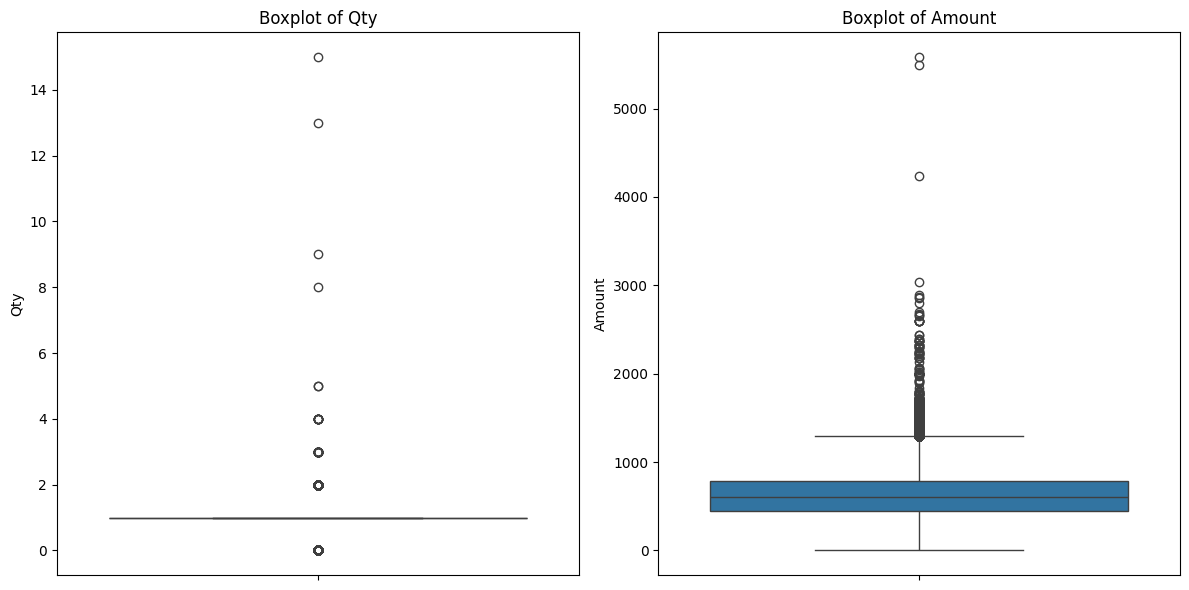

Outliers in Qty: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [79]:
numerical_features = ['Qty', 'Amount']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

for feature in numerical_features:
    outliers = find_outliers_iqr(df[feature])
    print(f"Outliers in {feature}: {outliers.tolist()}")

As we've seen from the boxplot, the outliers data is still reasonable, that's why we've decided to keep it.

In [80]:
outliers_qty = find_outliers_iqr(df['Qty'])
outliers_amount = find_outliers_iqr(df['Amount'])
df[(df['Qty'].isin(outliers_qty)) | (df['Amount'].isin(outliers_amount))]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,Cancelled,0,647.620000,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,Cancelled,0,753.330000,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,April
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,Cancelled,0,546.395385,HYDERABAD,TELANGANA,500008.0,IN,False,Others,April
23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,...,Cancelled,0,570.480000,pune,MAHARASHTRA,411044.0,IN,False,Easy Ship,April
29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,...,Cancelled,0,545.000000,GUWAHATI,ASSAM,781003.0,IN,False,Easy Ship,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128911,171-2686043-8605144,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XL,Set,XL,...,Shipped,1,1349.000000,PUNE,MAHARASHTRA,411002.0,IN,False,Others,May
128956,403-0816822-3188305,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,NW032,NW032-ST-CP-XXXL,Set,3XL,...,Shipped,2,992.000000,CHENNAI,TAMIL NADU,600042.0,IN,False,Others,May
128957,402-8261465-0622733,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,Shipped,1,1349.000000,RANCHI,JHARKHAND,834002.0,IN,False,Others,May
128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,L,...,Cancelled,0,805.818676,Bengaluru,KARNATAKA,560037.0,IN,False,Others,May


##**Exploratory Data Analysis**


After all the preprocessing, we will explore the data.

### **Unique values for each attribute**

In [81]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
Status,"['Cancelled', 'Shipped - Delivered to Buyer', ..."
Fulfilment,"['Merchant', 'Amazon'] Categories (2, object):..."
Sales Channel,"['Amazon.in', 'Non-Amazon'] Categories (2, obj..."
ship-service-level,"['Standard', 'Expedited'] Categories (2, objec..."
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"['Set', 'kurta', 'Western Dress', 'Top', 'Ethn..."
Size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."


### **Date Range**

In [82]:
print(f'The earliest date is {df["Date"].min()}')
print(f'The latest date is {df["Date"].max()}')

The earliest date is 2022-03-31 00:00:00
The latest date is 2022-06-29 00:00:00


### **Monthly Sales Distribution**

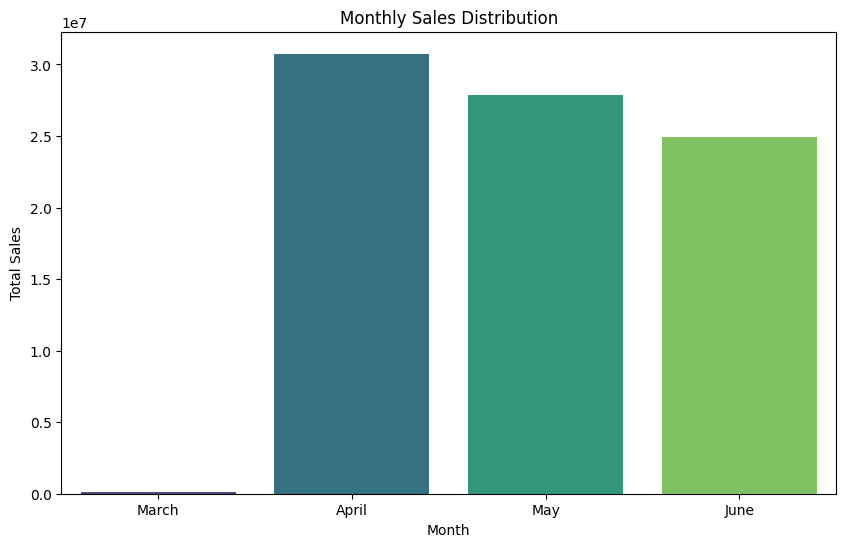

In [83]:
month_order = ['March', 'April', 'May', 'June']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis', order=month_order)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


### **The percentage of each order status**


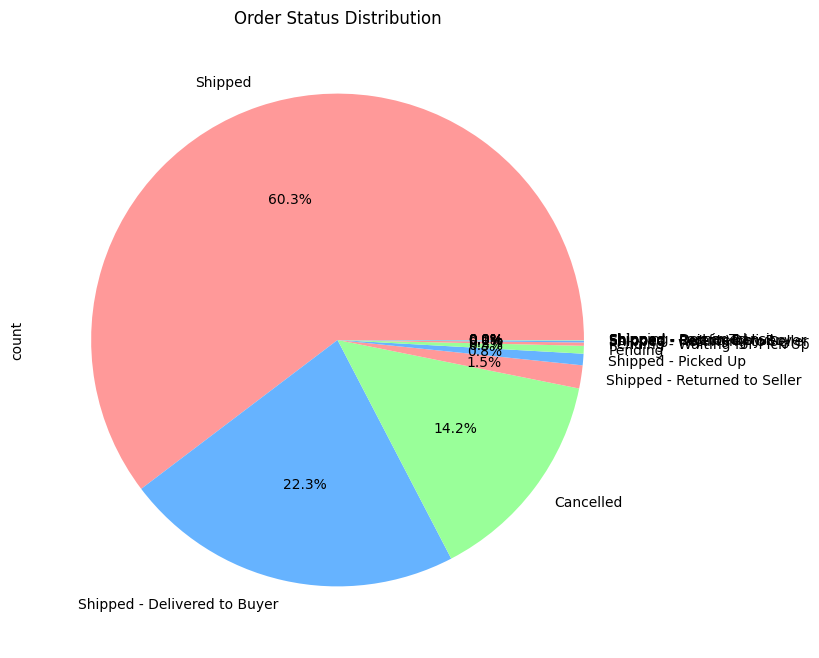

In [84]:
order_status_dist = df['Status'].value_counts()
plt.figure(figsize=(10, 8))
order_status_dist.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Order Status Distribution')
plt.show()

In [85]:
df['Status'].value_counts()

,count
Status,
Shipped,77801
Shipped - Delivered to Buyer,28769
Cancelled,18329
Shipped - Returned to Seller,1953
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


We will map each status into only 4 categories, Shipped, Pending, Cancelled, and Shipping.

In [86]:
status_mapping = {
    'Shipped': 'Shipped',
    'Shipped - Delivered to Buyer': 'Shipped',
    'Shipped - Returned to Seller': 'Shipped',
    'Shipped - Picked Up': 'Shipped',
    'Shipped - Returning to Seller': 'Shipped',
    'Shipped - Out for Delivery': 'Shipped',
    'Shipped - Rejected by Buyer': 'Shipped',
    'Shipped - Lost in Transit': 'Shipped',
    'Shipped - Damaged': 'Shipped',
    'Pending': 'Pending',
    'Pending - Waiting for Pick Up': 'Pending',
    'Cancelled': 'Cancelled',
    'Shipping': 'Shipping'
}

df['Status'] = df['Status'].map(status_mapping)

### **Fulfillment Status**


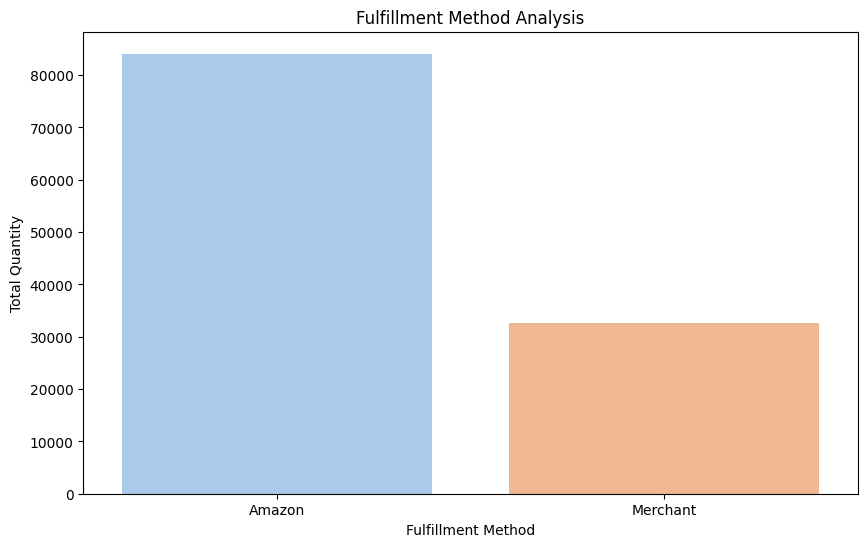

In [87]:
fulfillment_method = df.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_method.index, y=fulfillment_method.values, palette='pastel')
plt.title('Fulfillment Method Analysis')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Quantity')
plt.show()

### **Size**


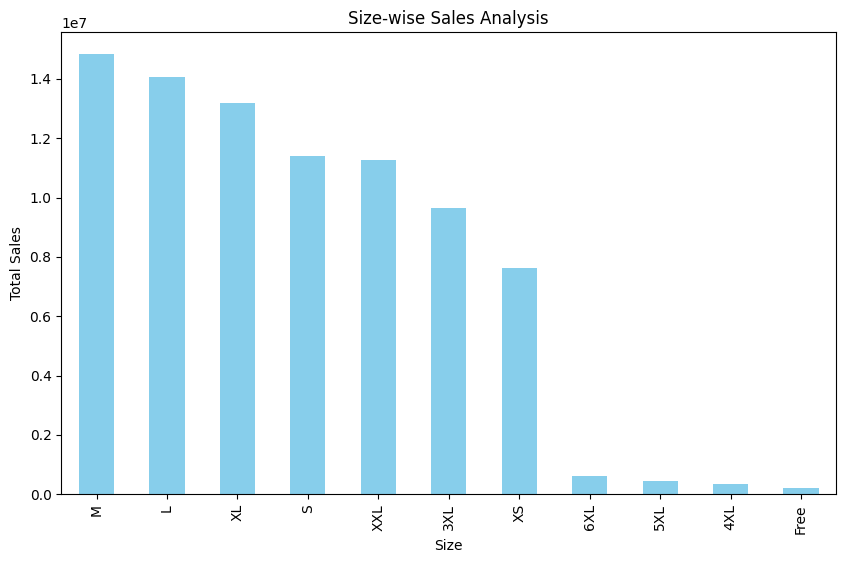

In [88]:
size_sales = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size_sales.plot.bar(color='skyblue')
plt.title('Size-wise Sales Analysis')
plt.xlabel('Size')
plt.ylabel('Total Sales')
plt.show()

##**Answering Questions**


After exploring the data, we will answer the question.

### **1.   How does sales performance vary across different categories, sizes, or styles?**

#### **Per Category**

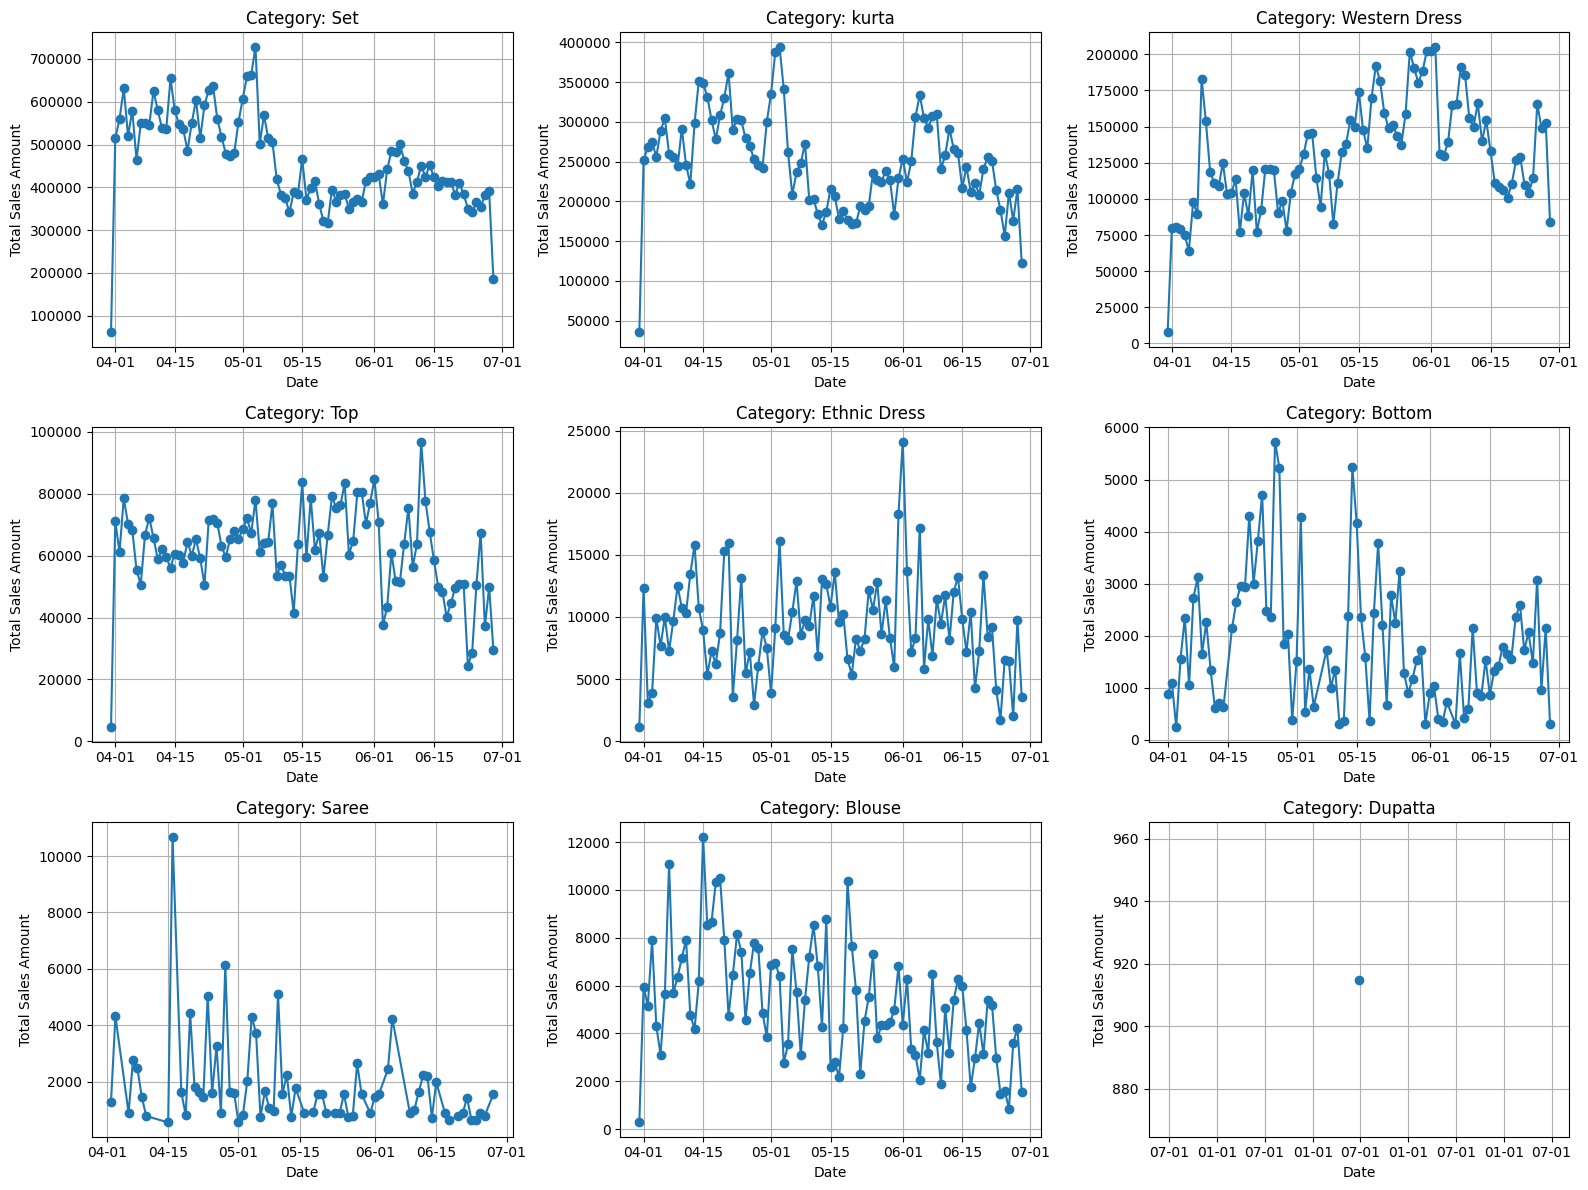

In [89]:
categories = df['Category'].unique()
n_categories = len(categories)

rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

for i, category in enumerate(categories):
    df_category = df[df['Category'] == category]
    df_category_daily = df_category.groupby('Date')['Amount'].sum()

    axes[i].plot(df_category_daily.index, df_category_daily.values, label=f"Category: {category}", marker='o', linestyle='-')
    axes[i].set_title(f'Category: {category}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Total Sales Amount')
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


The **Set** category shows a clear upward trend, with sales peaking around mid-May before slightly declining in the following weeks. Similarly, **Kurta** exhibits consistent fluctuations, maintaining a stable sales pattern and reaching its peak in mid-May. **Western Dress** also experiences a steady rise in sales, starting from mid-April and peaking around early June. In contrast, the **Top** category sees frequent fluctuations without a clear trend, but overall, sales remain relatively stable over time. On the other hand, **Ethnic Dress** displays erratic sales, marked by sharp spikes at irregular intervals, reflecting more volatility in customer demand.

The **Bottom** category, however, shows a steady upward trend, with sales gradually increasing and peaking in May. In contrast, **Saree** sales are highly volatile, with many low points and occasional sharp spikes, indicating unstable market performance. The **Blouse** category starts off strong in April but undergoes significant fluctuations, with an overall decline by the end of the period. Lastly, the **Dupatta** category presents only one data point, making it difficult to draw any meaningful conclusions about its sales trend.

#### **Per Size**

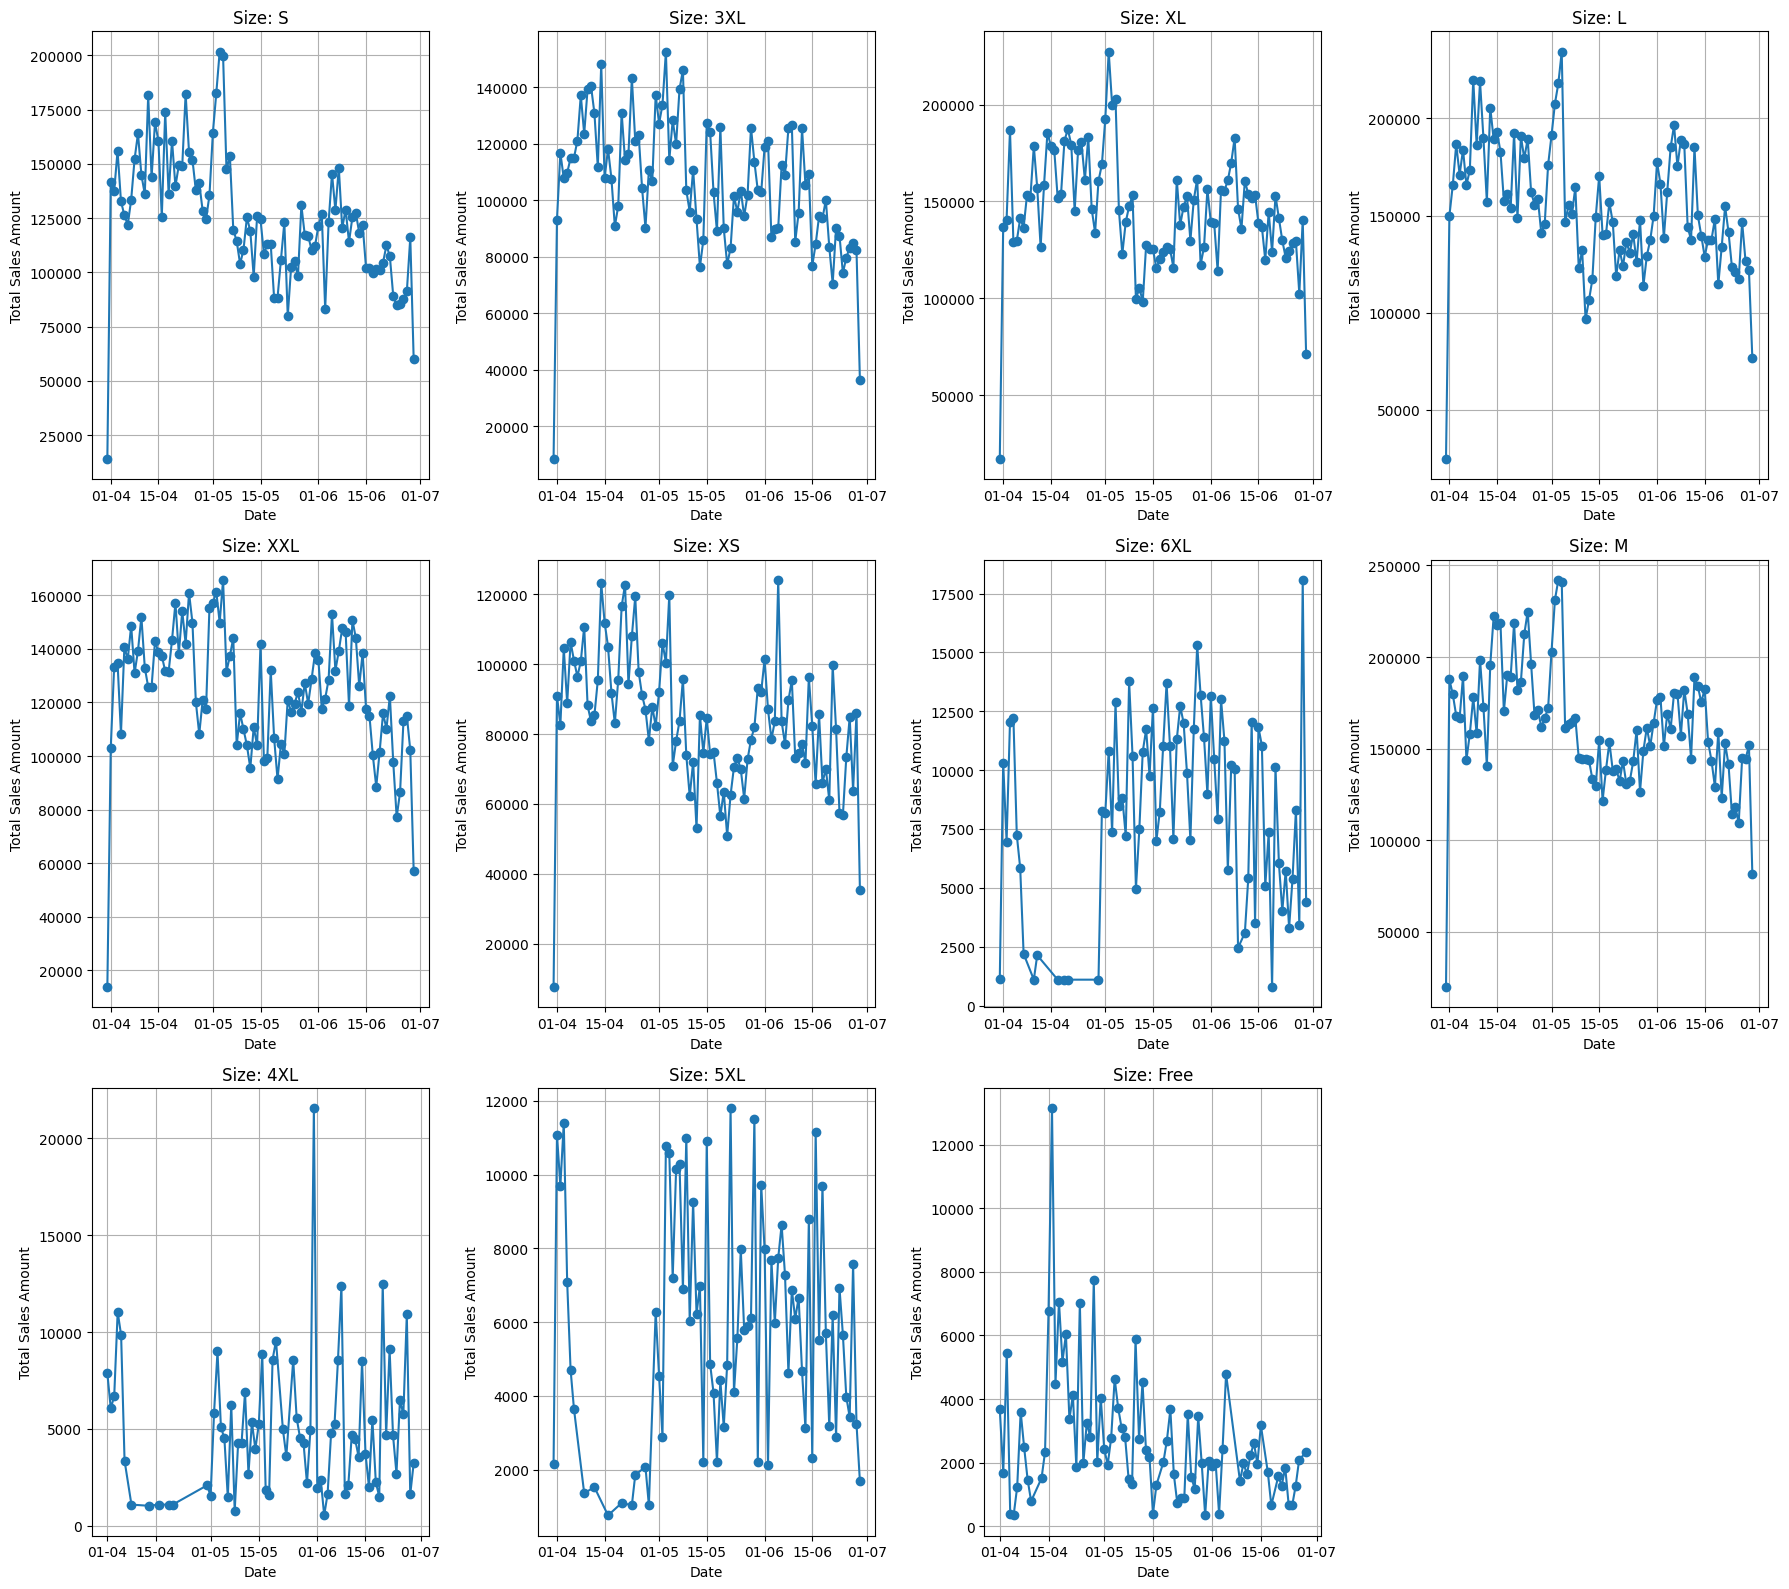

In [90]:
sizes = df['Size'].unique()
n_sizes = len(sizes)

rows = 3
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
axes = axes.flatten()

for i, size in enumerate(sizes):
    df_size = df[df['Size'] == size]
    df_size_daily = df_size.groupby('Date')['Amount'].sum()

    axes[i].plot(df_size_daily.index, df_size_daily.values, label=f"Size: {size}", marker='o', linestyle='-')
    axes[i].set_title(f'Size: {size}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Total Sales Amount')
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Size S** demonstrates a steady rise in sales until mid-May, after which the trend fluctuates and gradually declines. **Size 3XL** maintains consistent sales, fluctuating within a relatively high range but without a clear long-term trend. Similarly, **Size XL** shows an upward trajectory, peaking in mid-April, followed by fluctuations and a slight decline toward the end of the period. **Size L** follows a comparable pattern, with frequent ups and downs, showing no clear growth or decline in sales over time.

**Size XXL** initially performs well, with sales peaking around mid-May, but experiences a decline by late June. In contrast, **Size XS** is more volatile, characterized by sharp spikes, particularly in mid-April and early May, indicating erratic sales behavior. **Size 6XL** also shows instability, with sharp sales fluctuations and no consistent trend, while **Size M** reflects more stability, with strong peaks in early April and mid-May followed by a gradual decrease. The larger sizes, **4XL** and **5XL**, exhibit sporadic sales activity, with **4XL** showing low sales overall and **5XL** experiencing occasional sharp spikes. **Size Free** displays erratic sales behavior, with a few peaks but generally lower sales throughout the observed period.

### **2.   How do sales volumes change over time (daily, weekly, monthly)?**

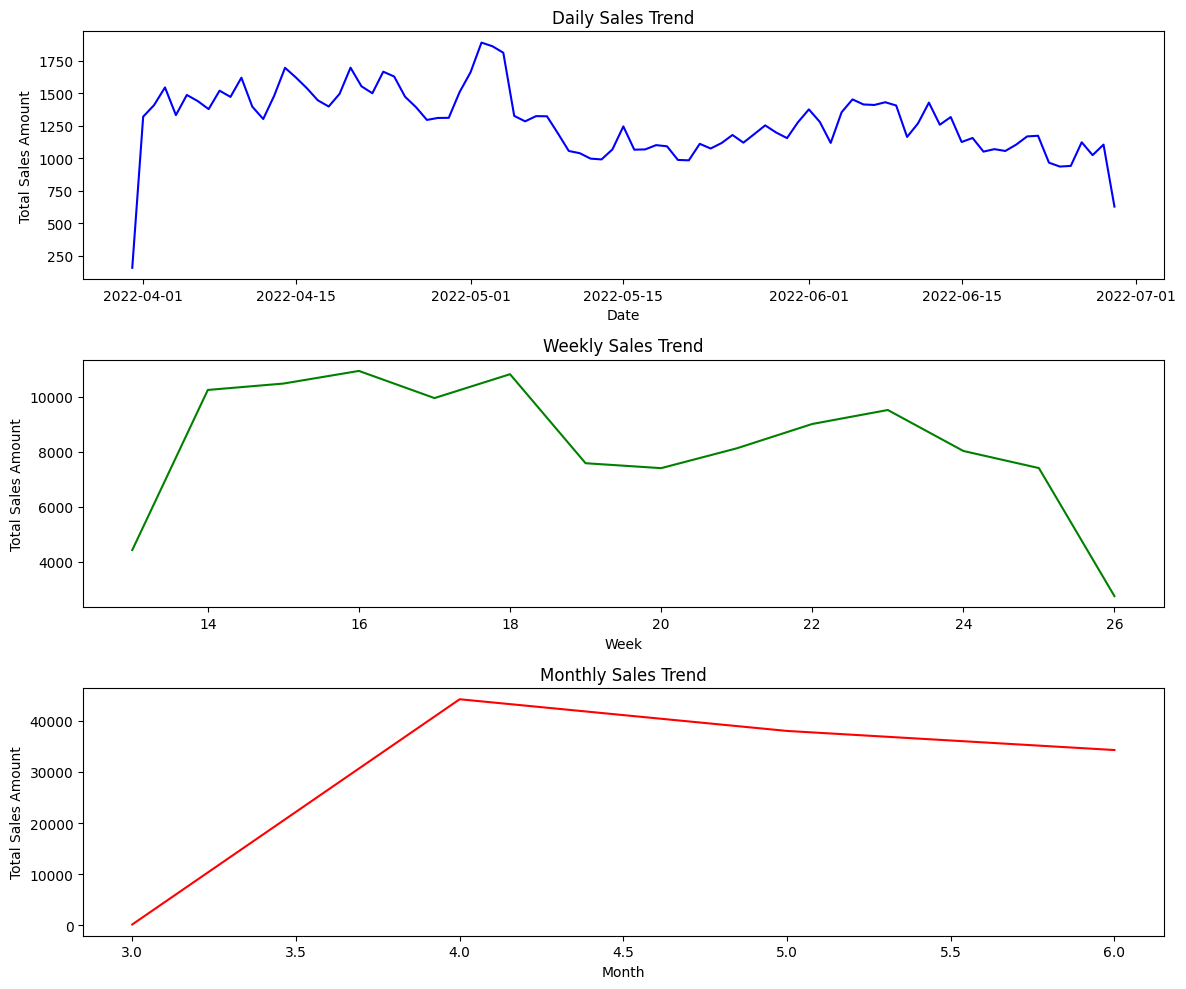

In [91]:
df_daily = df.groupby('Date')['Qty'].sum()
df_weekly = df.groupby(df['Date'].dt.isocalendar().week)['Qty'].sum()
df_monthly = df.groupby(df['Date'].dt.month)['Qty'].sum()

plt.figure(figsize=(12, 10))

# Daily
plt.subplot(3, 1, 1)
plt.plot(df_daily.index, df_daily.values, label="Daily Sales", color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')

# Weekly
plt.subplot(3, 1, 2)
plt.plot(df_weekly.index, df_weekly.values, label="Weekly Sales", color='green')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales Amount')

# Monthly
plt.subplot(3, 1, 3)
plt.plot(df_monthly.index, df_monthly.values, label="Monthly Sales", color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

plt.tight_layout()

plt.show()


The visualizations present an analysis of sales trends over daily, weekly, and monthly periods.

*   **Daily Sales Trend (Top Plot)**: The daily sales trend shows a relatively stable performance across the given time range (April to June 2022). The sales amounts fluctuate between 1,000 and 1,750 units with some minor peaks and troughs. There is a slight downward trend toward the end of June, though the values are still consistently above 1,000 for most of the period. This indicates steady daily demand with occasional dips.

*   **Weekly Sales Trend (Middle Plot)**: The weekly sales trend, spanning from Week 12 to Week 26, shows an initial increase in sales, peaking around Weeks 16 to 18, with total weekly sales reaching approximately 11,000 units. After Week 20, the sales show a gradual decline, ending at a low point in Week 26. This suggests that sales activity was highest in the middle of the analyzed period, with a gradual slowdown toward the end.

*   **Monthly Sales Trend (Bottom Plot)**: The monthly sales trend shows a rapid increase from March to April, where the sales hit a peak of around 40,000 units. However, after April, there is a noticeable decline in sales through May and June, with the sales amounts gradually decreasing. This pattern suggests that sales activity surged in April, but began to taper off in the following months.

Overall, the it suggests a strong initial growth in sales that later stabilizes at a lower level, indicating a potential seasonal peak in April followed by a decline in demand during the later months.

### **3.   What percentage of orders face delivery delays or cancellations?**

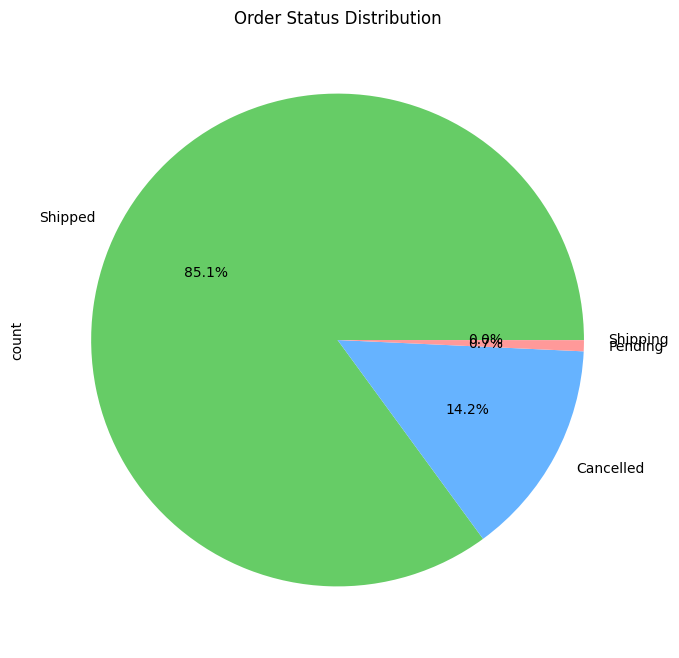

In [92]:
order_status_dist = df['Status'].value_counts()
plt.figure(figsize=(10, 8))
order_status_dist.plot.pie(autopct='%1.1f%%', colors=['#66cc66','#66b3ff','#ff9999','#cccccc'])
plt.title('Order Status Distribution')
plt.show()

The Order Status Distribution pie chart reveals that the majority of the orders, about 85.1%, are in the Shipped status, indicating that most of the orders are successfully processed and dispatched. However, 14.2% of the orders were Cancelled, which could be an area of concern for the business to investigate and reduce cancellation rates.

Smaller categories, such as Shipping and Pending each make up less than 1% of the total orders. These might represent edge cases or specific order handling scenarios but do not significantly impact the overall distribution.

## **DOWNLOAD FILE**

In [93]:
df.to_excel("Hasil Amazon.xlsx")